In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Avacado
df=pd.read_csv("avocado-2020.csv")

In [3]:
df

date  average_price  total_volume        4046       4225  \
0      2015-01-04           1.22      40873.28     2819.50   28287.42   
1      2015-01-04           1.79       1373.95       57.42     153.88   
2      2015-01-04           1.00     435021.49   364302.39   23821.16   
3      2015-01-04           1.76       3846.69     1500.15     938.35   
4      2015-01-04           1.08     788025.06    53987.31  552906.04   
...           ...            ...           ...         ...        ...   
33040  2020-11-29           1.47    1583056.27    67544.48   97996.46   
33041  2020-11-29           0.91    5811114.22  1352877.53  589061.83   
33042  2020-11-29           1.48     289961.27    13273.75   19341.09   
33043  2020-11-29           0.67     822818.75   234688.01   80205.15   
33044  2020-11-29           1.35      24106.58     1236.96     617.80   

           4770  total_bags  small_bags  large_bags  xlarge_bags  \
0         49.90     9716.46     9186.93      529.53         0.00   
1          0.00     1162.65     1162.65        0.00         0.00   
2         82.15    46815.79    16707.15    30108.64         0.00   
3          0.00     1408.19     1071.35      336.84         0.00   
4      39995.03   141136.68   137146.07     3990.61         0.00   
...         ...         ...         ...         ...          ...   
33040   2617.17  1414878.10   906711.52   480191.83     27974.75   
33041  19741.90  3790665.29  2197611.02  1531530.14     61524.13   
33042    636.51   256709.92   122606.21   134103.71         0.00   
33043  10543.63   497381.96   285764.11   210808.02       809.83   
33044   1564.98    20686.84    17824.52     2862.32         0.00   

               type  year             geography  
0      conventional  2015                Albany  
1           organic  2015                Albany  
2      conventional  2015               Atlanta  
3           organic  2015               Atlanta  
4      conventional  2015  Baltimore/Washington  
...             ...   ...                   ...  
33040       organic  2020            Total U.S.  
33041  conventional  2020                  West  
33042       organic  2020                  West  
33043  conventional  2020   West Tex/New Mexico  
33044       organic  2020   West Tex/New Mexico  

[33045 rows x 13 columns]

<AxesSubplot:>

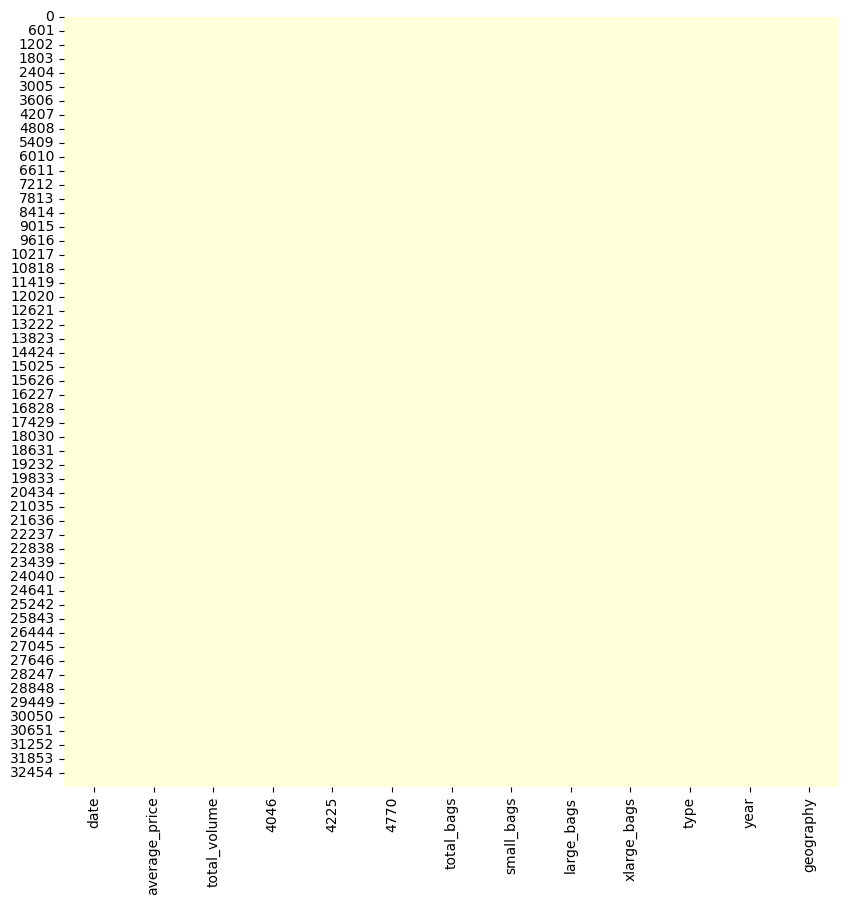

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull() , cbar = False ,cmap='YlGnBu')

In [5]:
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [6]:
df.tail()

date  average_price  total_volume        4046       4225  \
33040  2020-11-29           1.47    1583056.27    67544.48   97996.46   
33041  2020-11-29           0.91    5811114.22  1352877.53  589061.83   
33042  2020-11-29           1.48     289961.27    13273.75   19341.09   
33043  2020-11-29           0.67     822818.75   234688.01   80205.15   
33044  2020-11-29           1.35      24106.58     1236.96     617.80   

           4770  total_bags  small_bags  large_bags  xlarge_bags  \
33040   2617.17  1414878.10   906711.52   480191.83     27974.75   
33041  19741.90  3790665.29  2197611.02  1531530.14     61524.13   
33042    636.51   256709.92   122606.21   134103.71         0.00   
33043  10543.63   497381.96   285764.11   210808.02       809.83   
33044   1564.98    20686.84    17824.52     2862.32         0.00   

               type  year            geography  
33040       organic  2020           Total U.S.  
33041  conventional  2020                 West  
33042       organic  2020                 West  
33043  conventional  2020  West Tex/New Mexico  
33044       organic  2020  West Tex/New Mexico

In [7]:
df.sort_values('date')

date  average_price  total_volume      4046      4225      4770  \
0      2015-01-04           1.22      40873.28   2819.50  28287.42     49.90   
78     2015-01-04           1.13     109215.00  48285.15  37562.78     34.10   
77     2015-01-04           1.54       4212.16    238.48   1678.83    372.55   
76     2015-01-04           1.13     182697.97  56293.75  80396.09   9762.41   
75     2015-01-04           2.01       3397.00     58.22   1493.90    772.21   
...           ...            ...           ...       ...       ...       ...   
32966  2020-11-29           1.20       5270.83      5.86    499.77      0.00   
32965  2020-11-29           1.21     156868.20  17780.46  43514.67  44314.73   
32964  2020-11-29           1.36      19723.34    252.24   1364.20      0.00   
32975  2020-11-29           0.78     200284.09  48129.95  37637.47   5118.56   
33044  2020-11-29           1.35      24106.58   1236.96    617.80   1564.98   

       total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0         9716.46     9186.93      529.53         0.00  conventional  2015   
78       23332.97    21582.97     1750.00         0.00  conventional  2015   
77        1922.30     1570.28      352.02         0.00       organic  2015   
76       36245.72    31778.36     4467.36         0.00  conventional  2015   
75        1072.67      993.94       78.73         0.00       organic  2015   
...           ...         ...         ...          ...           ...   ...   
32966     4765.20     4765.20        0.00         0.00       organic  2020   
32965    51258.34    39468.06     5111.72      6678.56  conventional  2020   
32964    18106.90     3864.71    14242.19         0.00       organic  2020   
32975   109398.11   100336.24     3084.27      5977.60  conventional  2020   
33044    20686.84    17824.52     2862.32         0.00       organic  2020   

                 geography  
0                   Albany  
78                 Roanoke  
77        Richmond/Norfolk  
76        Richmond/Norfolk  
75      Raleigh/Greensboro  
...                    ...  
32966         Grand Rapids  
32965         Grand Rapids  
32964              Detroit  
32975         Indianapolis  
33044  West Tex/New Mexico  

[33045 rows x 13 columns]

In [8]:
plt.figure(figsize=(100,100))
plt.plot(df["date"],df['average_price'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'Baltimore/Washington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'Buffalo/Rochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'Cincinnati/Dayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'Dallas/Ft. Worth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'Grand Rapids'),
  Text(15, 0, 'Great Lakes'),
  Text(16, 0, 'Harrisburg/Scranton'),
  Text(17, 0, 'Hartford/Springfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'Las Vegas'),
  Text(22, 0, 'Los Angeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'Miami/Ft. Lauderdale'),
 

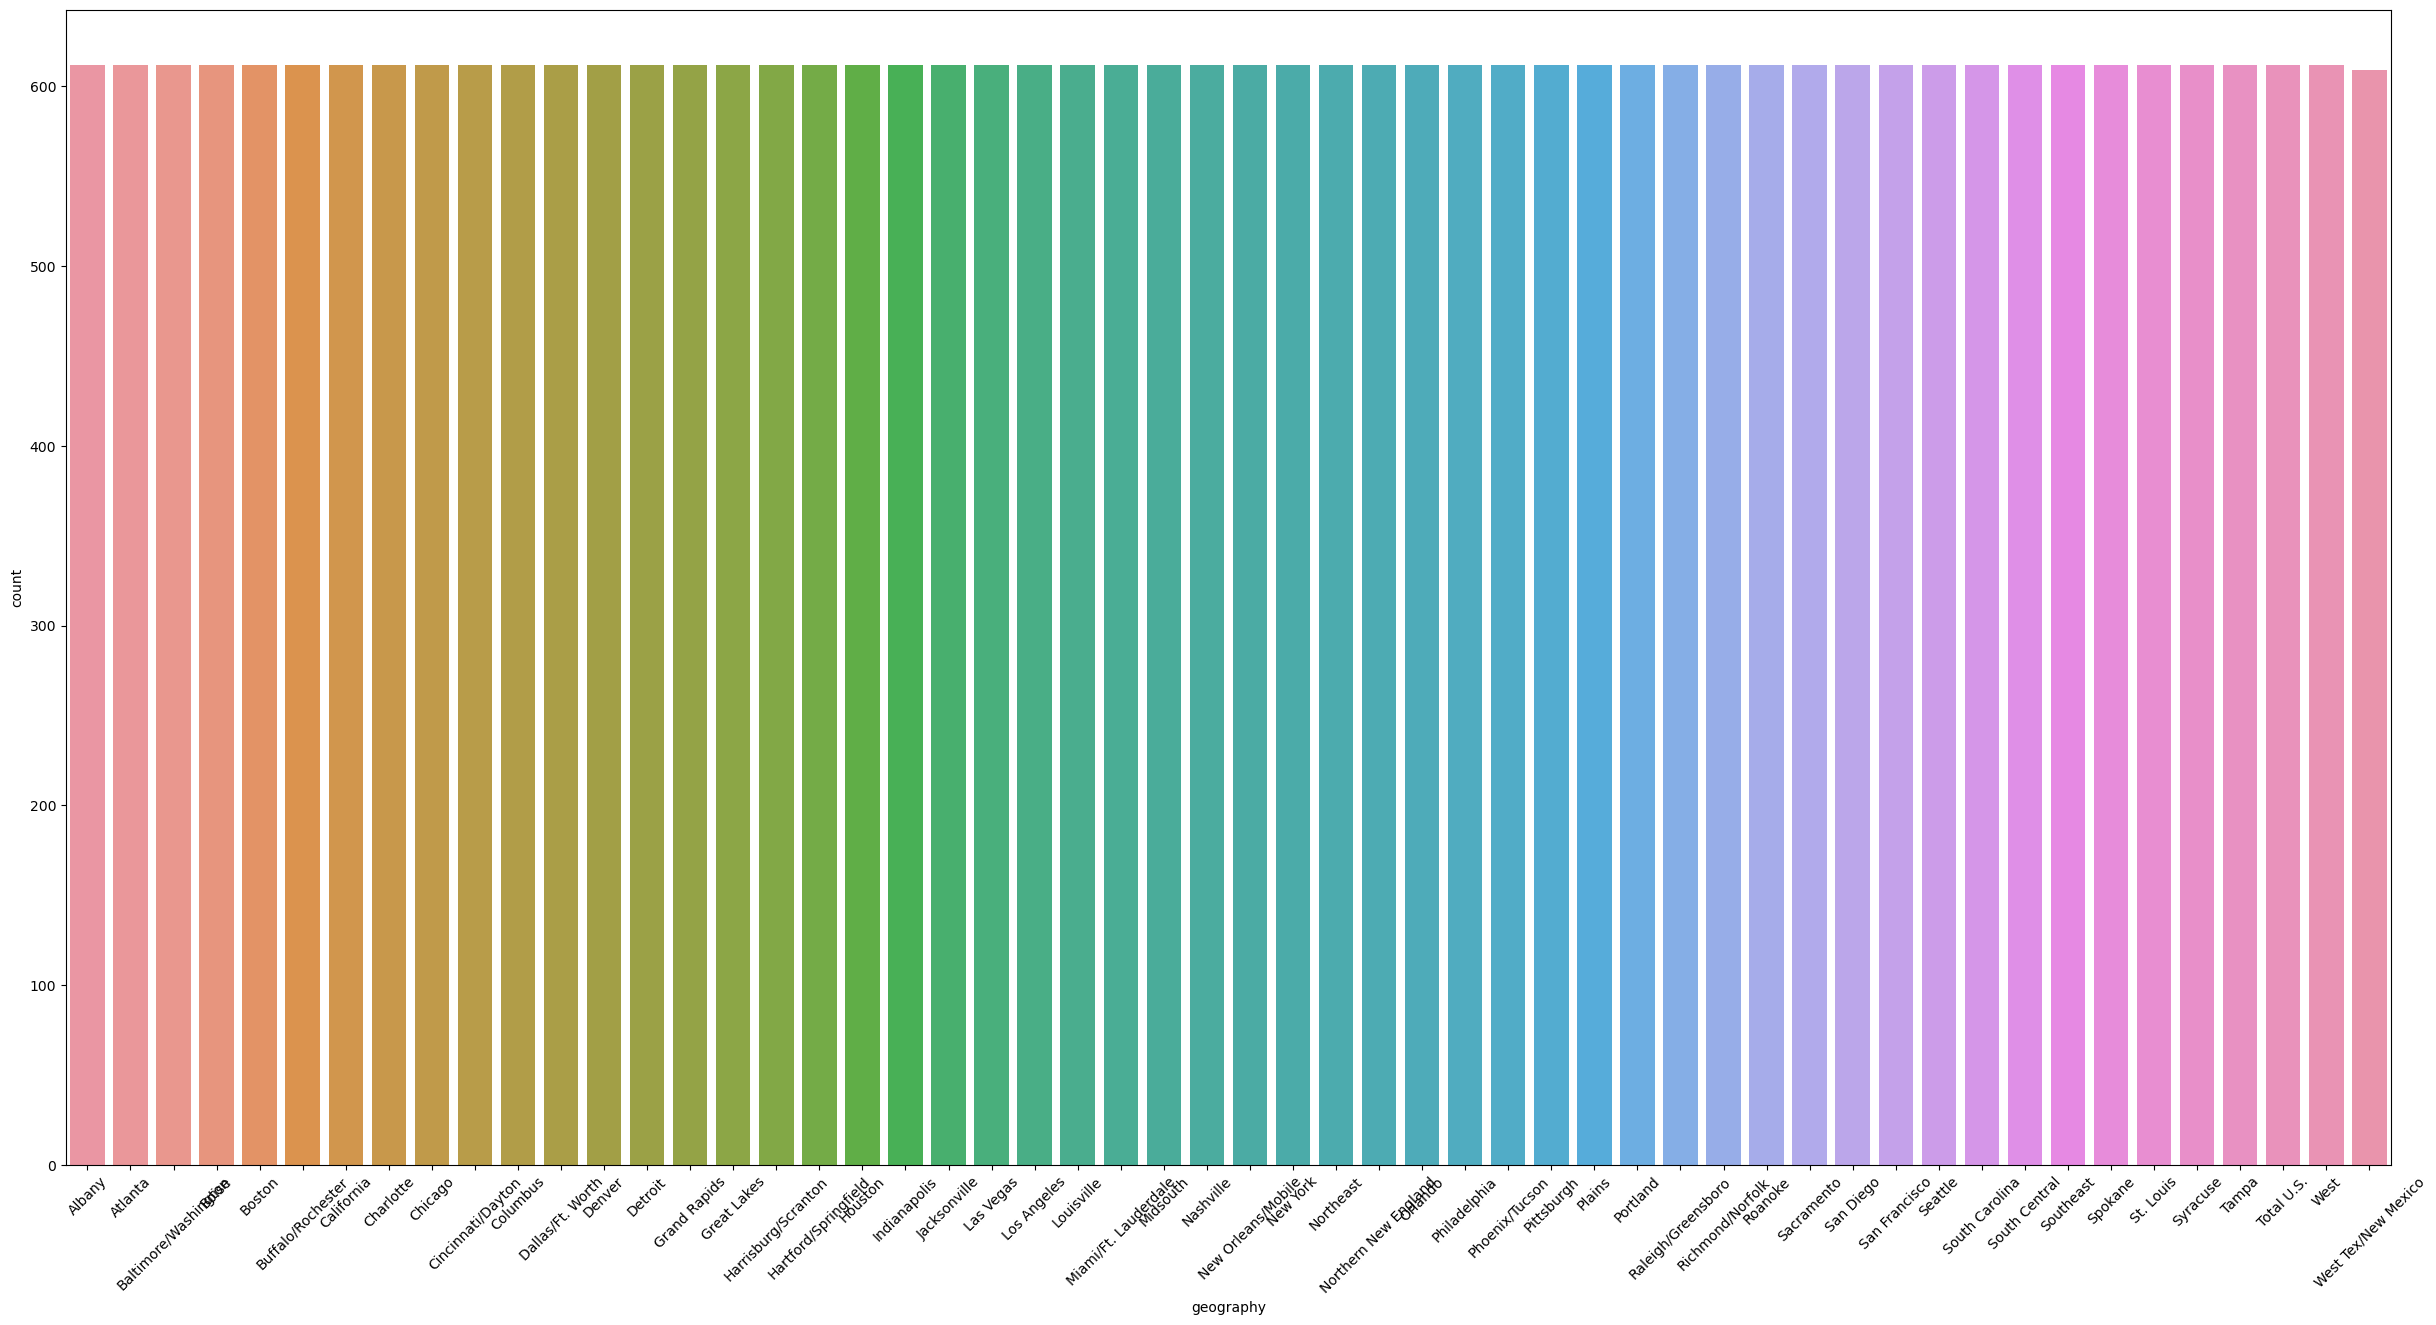

In [9]:
plt.figure(figsize=(30,15))
sns.countplot(x="geography" , data=df)
plt.xticks(rotation=45)


<AxesSubplot:xlabel='year', ylabel='count'>

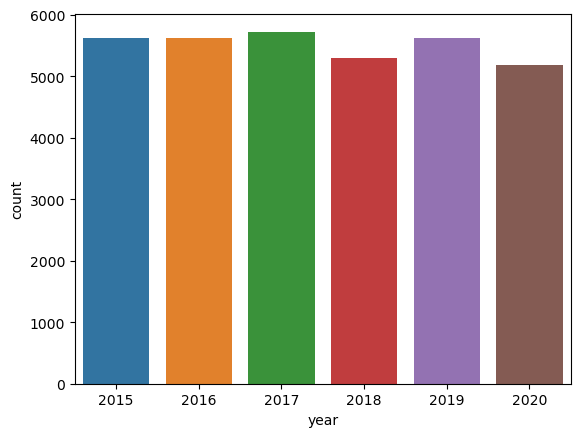

In [10]:
sns.countplot(x='year' , data=df)

In [11]:
df.head()

date  average_price  total_volume       4046       4225      4770  \
0  2015-01-04           1.22      40873.28    2819.50   28287.42     49.90   
1  2015-01-04           1.79       1373.95      57.42     153.88      0.00   
2  2015-01-04           1.00     435021.49  364302.39   23821.16     82.15   
3  2015-01-04           1.76       3846.69    1500.15     938.35      0.00   
4  2015-01-04           1.08     788025.06   53987.31  552906.04  39995.03   

   total_bags  small_bags  large_bags  xlarge_bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     1162.65     1162.65        0.00          0.0       organic  2015   
2    46815.79    16707.15    30108.64          0.0  conventional  2015   
3     1408.19     1071.35      336.84          0.0       organic  2015   
4   141136.68   137146.07     3990.61          0.0  conventional  2015   

              geography  
0                Albany  
1                Albany  
2               Atlanta  
3               Atlanta  
4  Baltimore/Washington

In [12]:
avacado_df=df[['date','average_price']]

In [13]:
avacado_df=avacado_df.rename(columns={'date':'ds','average_price':'y'})

In [14]:
avacado_df

ds     y
0      2015-01-04  1.22
1      2015-01-04  1.79
2      2015-01-04  1.00
3      2015-01-04  1.76
4      2015-01-04  1.08
...           ...   ...
33040  2020-11-29  1.47
33041  2020-11-29  0.91
33042  2020-11-29  1.48
33043  2020-11-29  0.67
33044  2020-11-29  1.35

[33045 rows x 2 columns]

In [15]:
model=Prophet()

In [16]:
fited_model=model.fit(avacado_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [17]:
prediction=fited_model.make_future_dataframe(periods=365*3)

In [18]:
forcast=fited_model.predict(prediction)

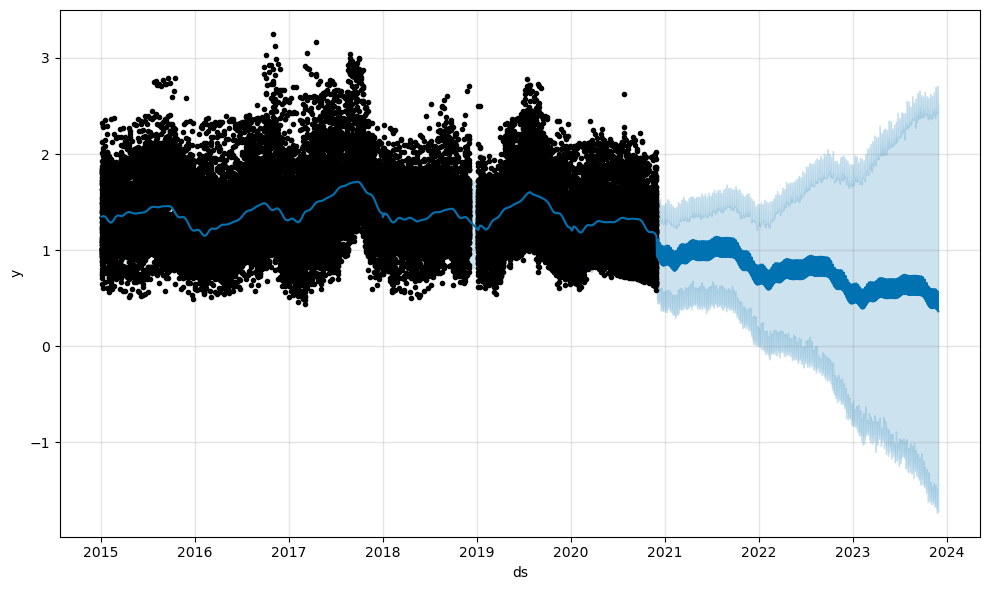

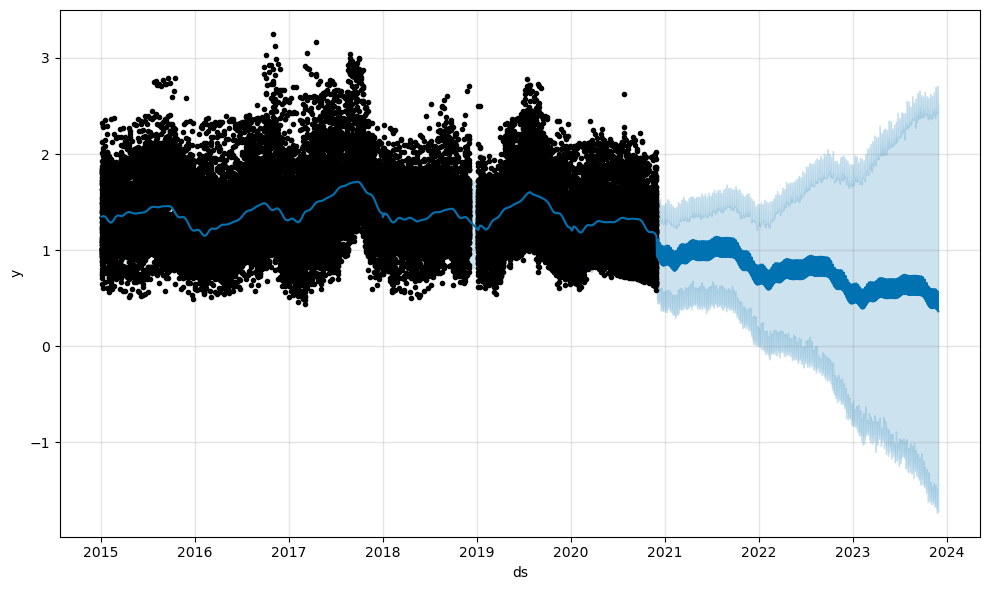

In [19]:
model.plot(forcast)

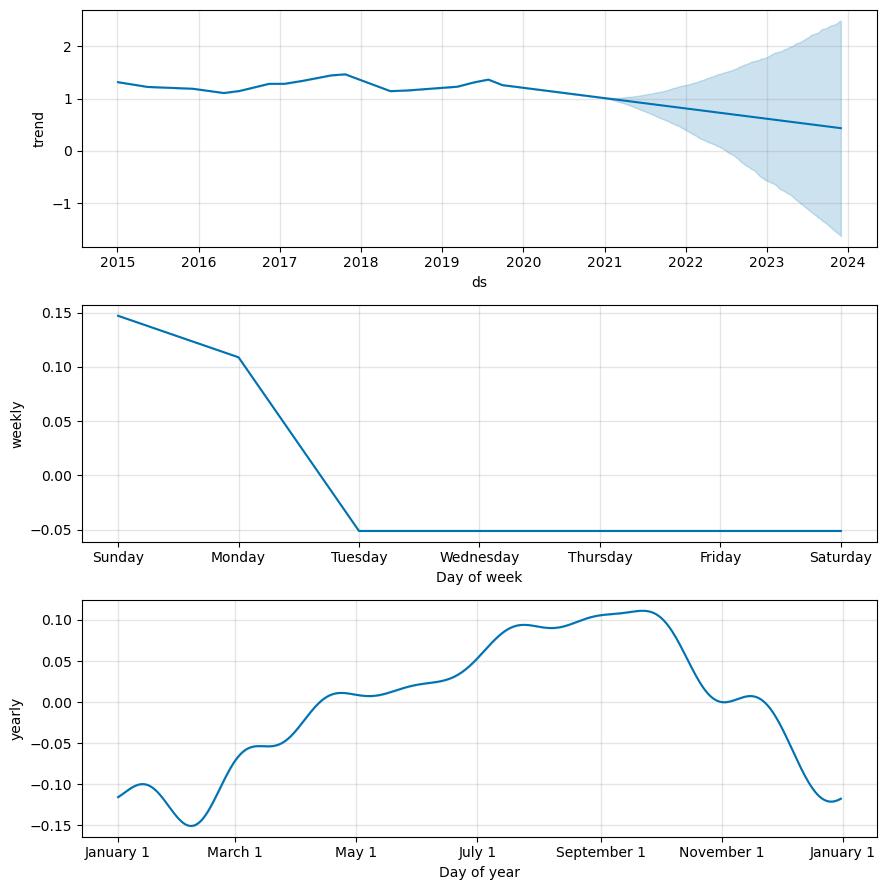

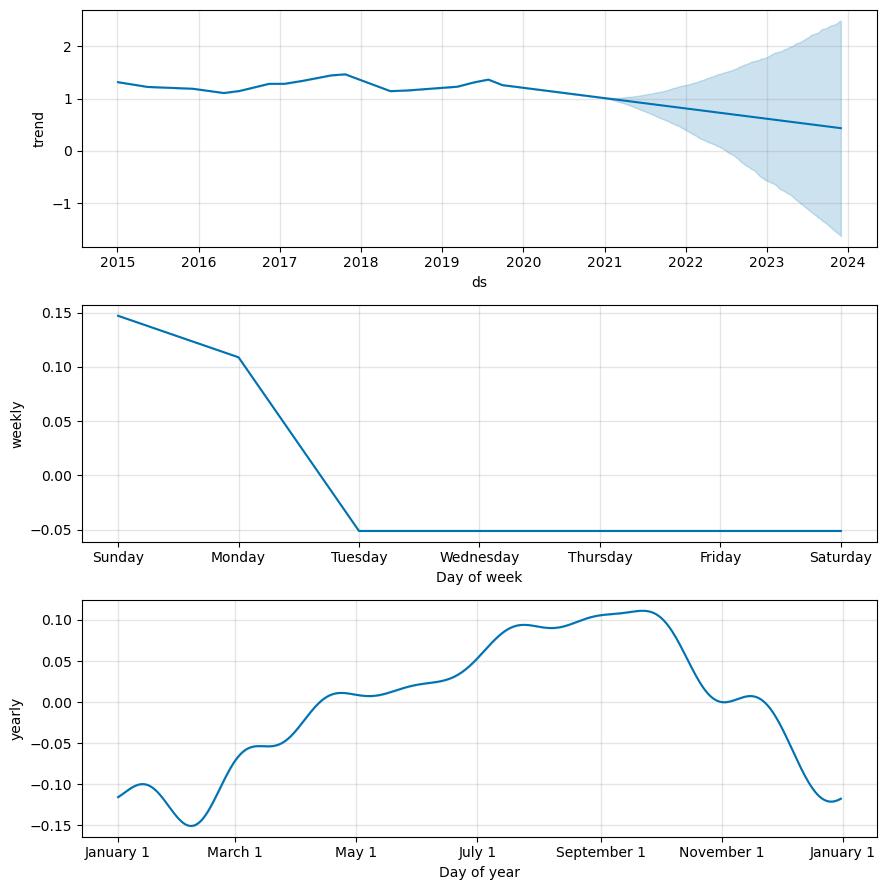

In [20]:
model.plot_components(forcast)

In [21]:
# load data based on region
df2= pd.read_csv("avocado-2020.csv")

In [22]:
df_region=df2[df2['geography']=='West']

In [23]:
df_region

date  average_price  total_volume        4046        4225  \
104    2015-01-04           0.89    5794410.58  2275446.87  2582300.65   
105    2015-01-04           1.40     187548.30    70313.71    72942.11   
212    2015-01-11           0.95    5333097.71  2203111.92  2292761.26   
213    2015-01-11           1.39     223156.55    80139.16   111395.01   
320    2015-01-18           0.96    5475363.01  2431736.63  2258069.63   
...           ...            ...           ...         ...         ...   
32826  2020-11-15           1.46     336639.51    11674.96    23851.14   
32933  2020-11-22           0.87    7140154.25  1675718.45   807664.56   
32934  2020-11-22           1.47     316156.26    12738.90    18889.75   
33041  2020-11-29           0.91    5811114.22  1352877.53   589061.83   
33042  2020-11-29           1.48     289961.27    13273.75    19341.09   

            4770  total_bags  small_bags  large_bags  xlarge_bags  \
104     97024.09   839638.97   688813.01   150819.57         6.39   
105        24.30    44268.18    10023.72    34244.46         0.00   
212    127412.09   709812.44   598705.08   111073.82        33.54   
213        63.88    31558.50     9296.76    22261.74         0.00   
320     76348.13   709208.62   527358.78   181809.88        39.96   
...          ...         ...         ...         ...          ...   
32826     969.98   300143.43   161539.76   138603.67         0.00   
32933   23125.59  4611089.70  2548485.39  1993920.98     68683.33   
32934     643.56   283884.05   148357.44   135526.61         0.00   
33041   19741.90  3790665.29  2197611.02  1531530.14     61524.13   
33042     636.51   256709.92   122606.21   134103.71         0.00   

               type  year geography  
104    conventional  2015      West  
105         organic  2015      West  
212    conventional  2015      West  
213         organic  2015      West  
320    conventional  2015      West  
...             ...   ...       ...  
32826       organic  2020      West  
32933  conventional  2020      West  
32934       organic  2020      West  
33041  conventional  2020      West  
33042       organic  2020      West  

[612 rows x 13 columns]

In [24]:
df_region_df=df_region[[ 'date' , 'average_price']]

In [25]:
model_region=Prophet()

In [26]:
df_region_df.head()

date  average_price
104  2015-01-04           0.89
105  2015-01-04           1.40
212  2015-01-11           0.95
213  2015-01-11           1.39
320  2015-01-18           0.96

In [27]:
df_region_df=df_region_df.rename(columns={"date":"ds","average_price":"y"})

In [28]:
future_region=model_region.fit(df_region_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [35]:
prediction=model_region.make_future_dataframe(periods=365*3)

In [36]:
predict=model_region.predict(prediction)

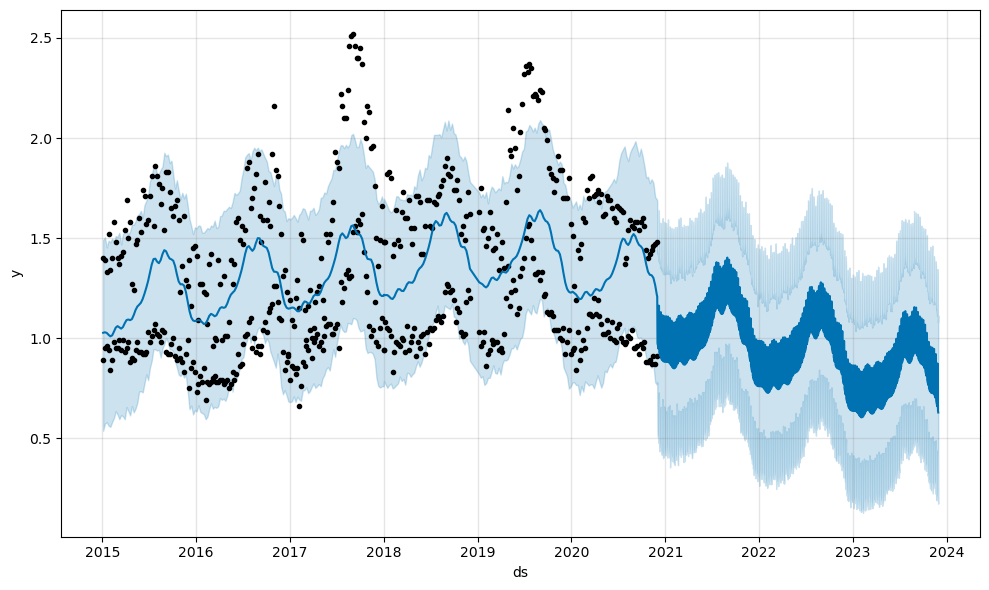

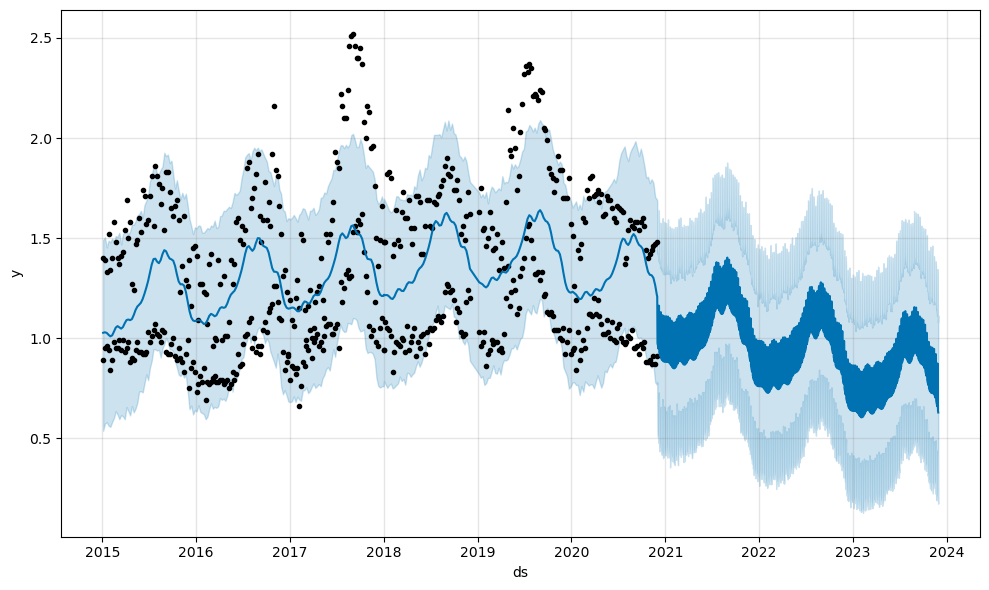

In [37]:
model_region.plot(predict)

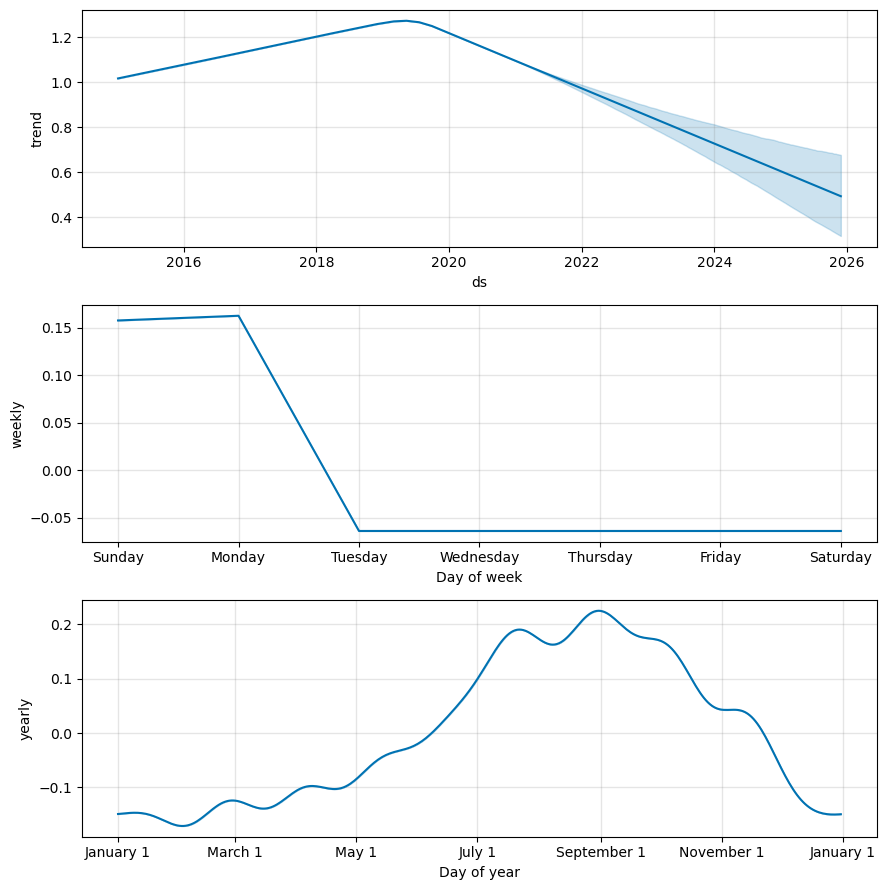

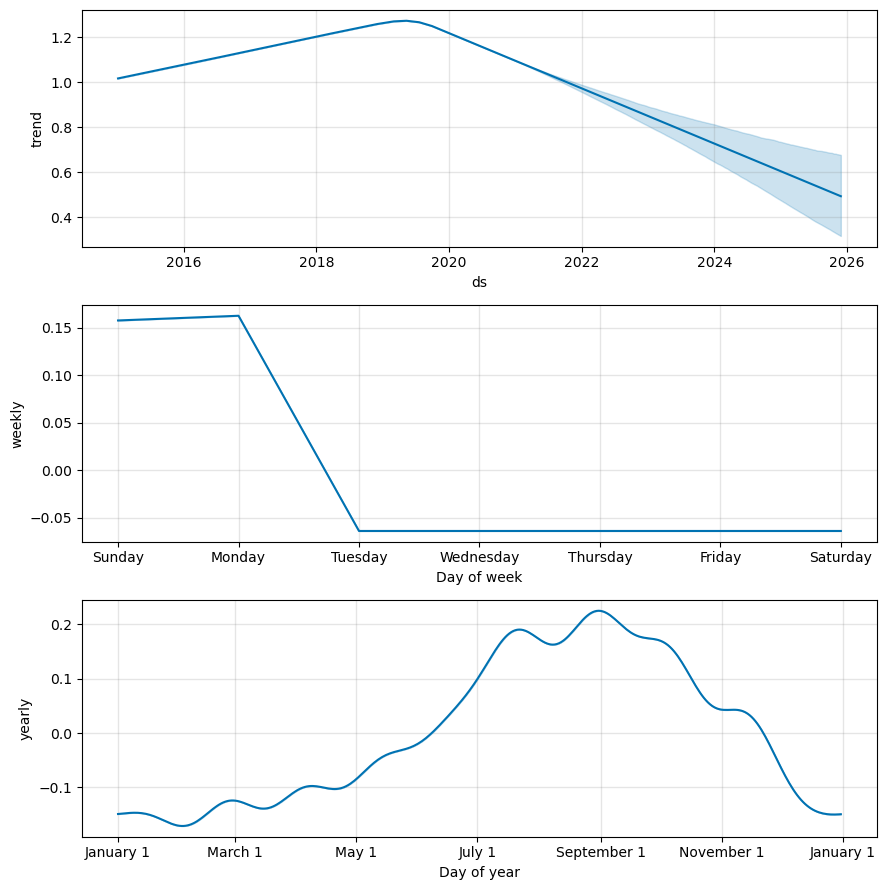

In [32]:
model_region.plot_components(predict)

In [33]:
# analizing which colum has more waitage 


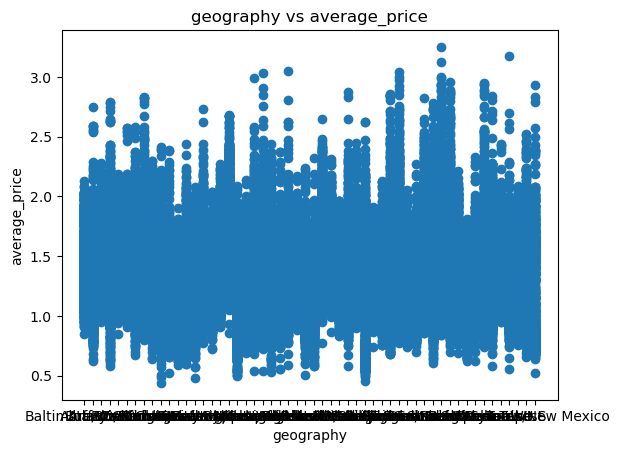

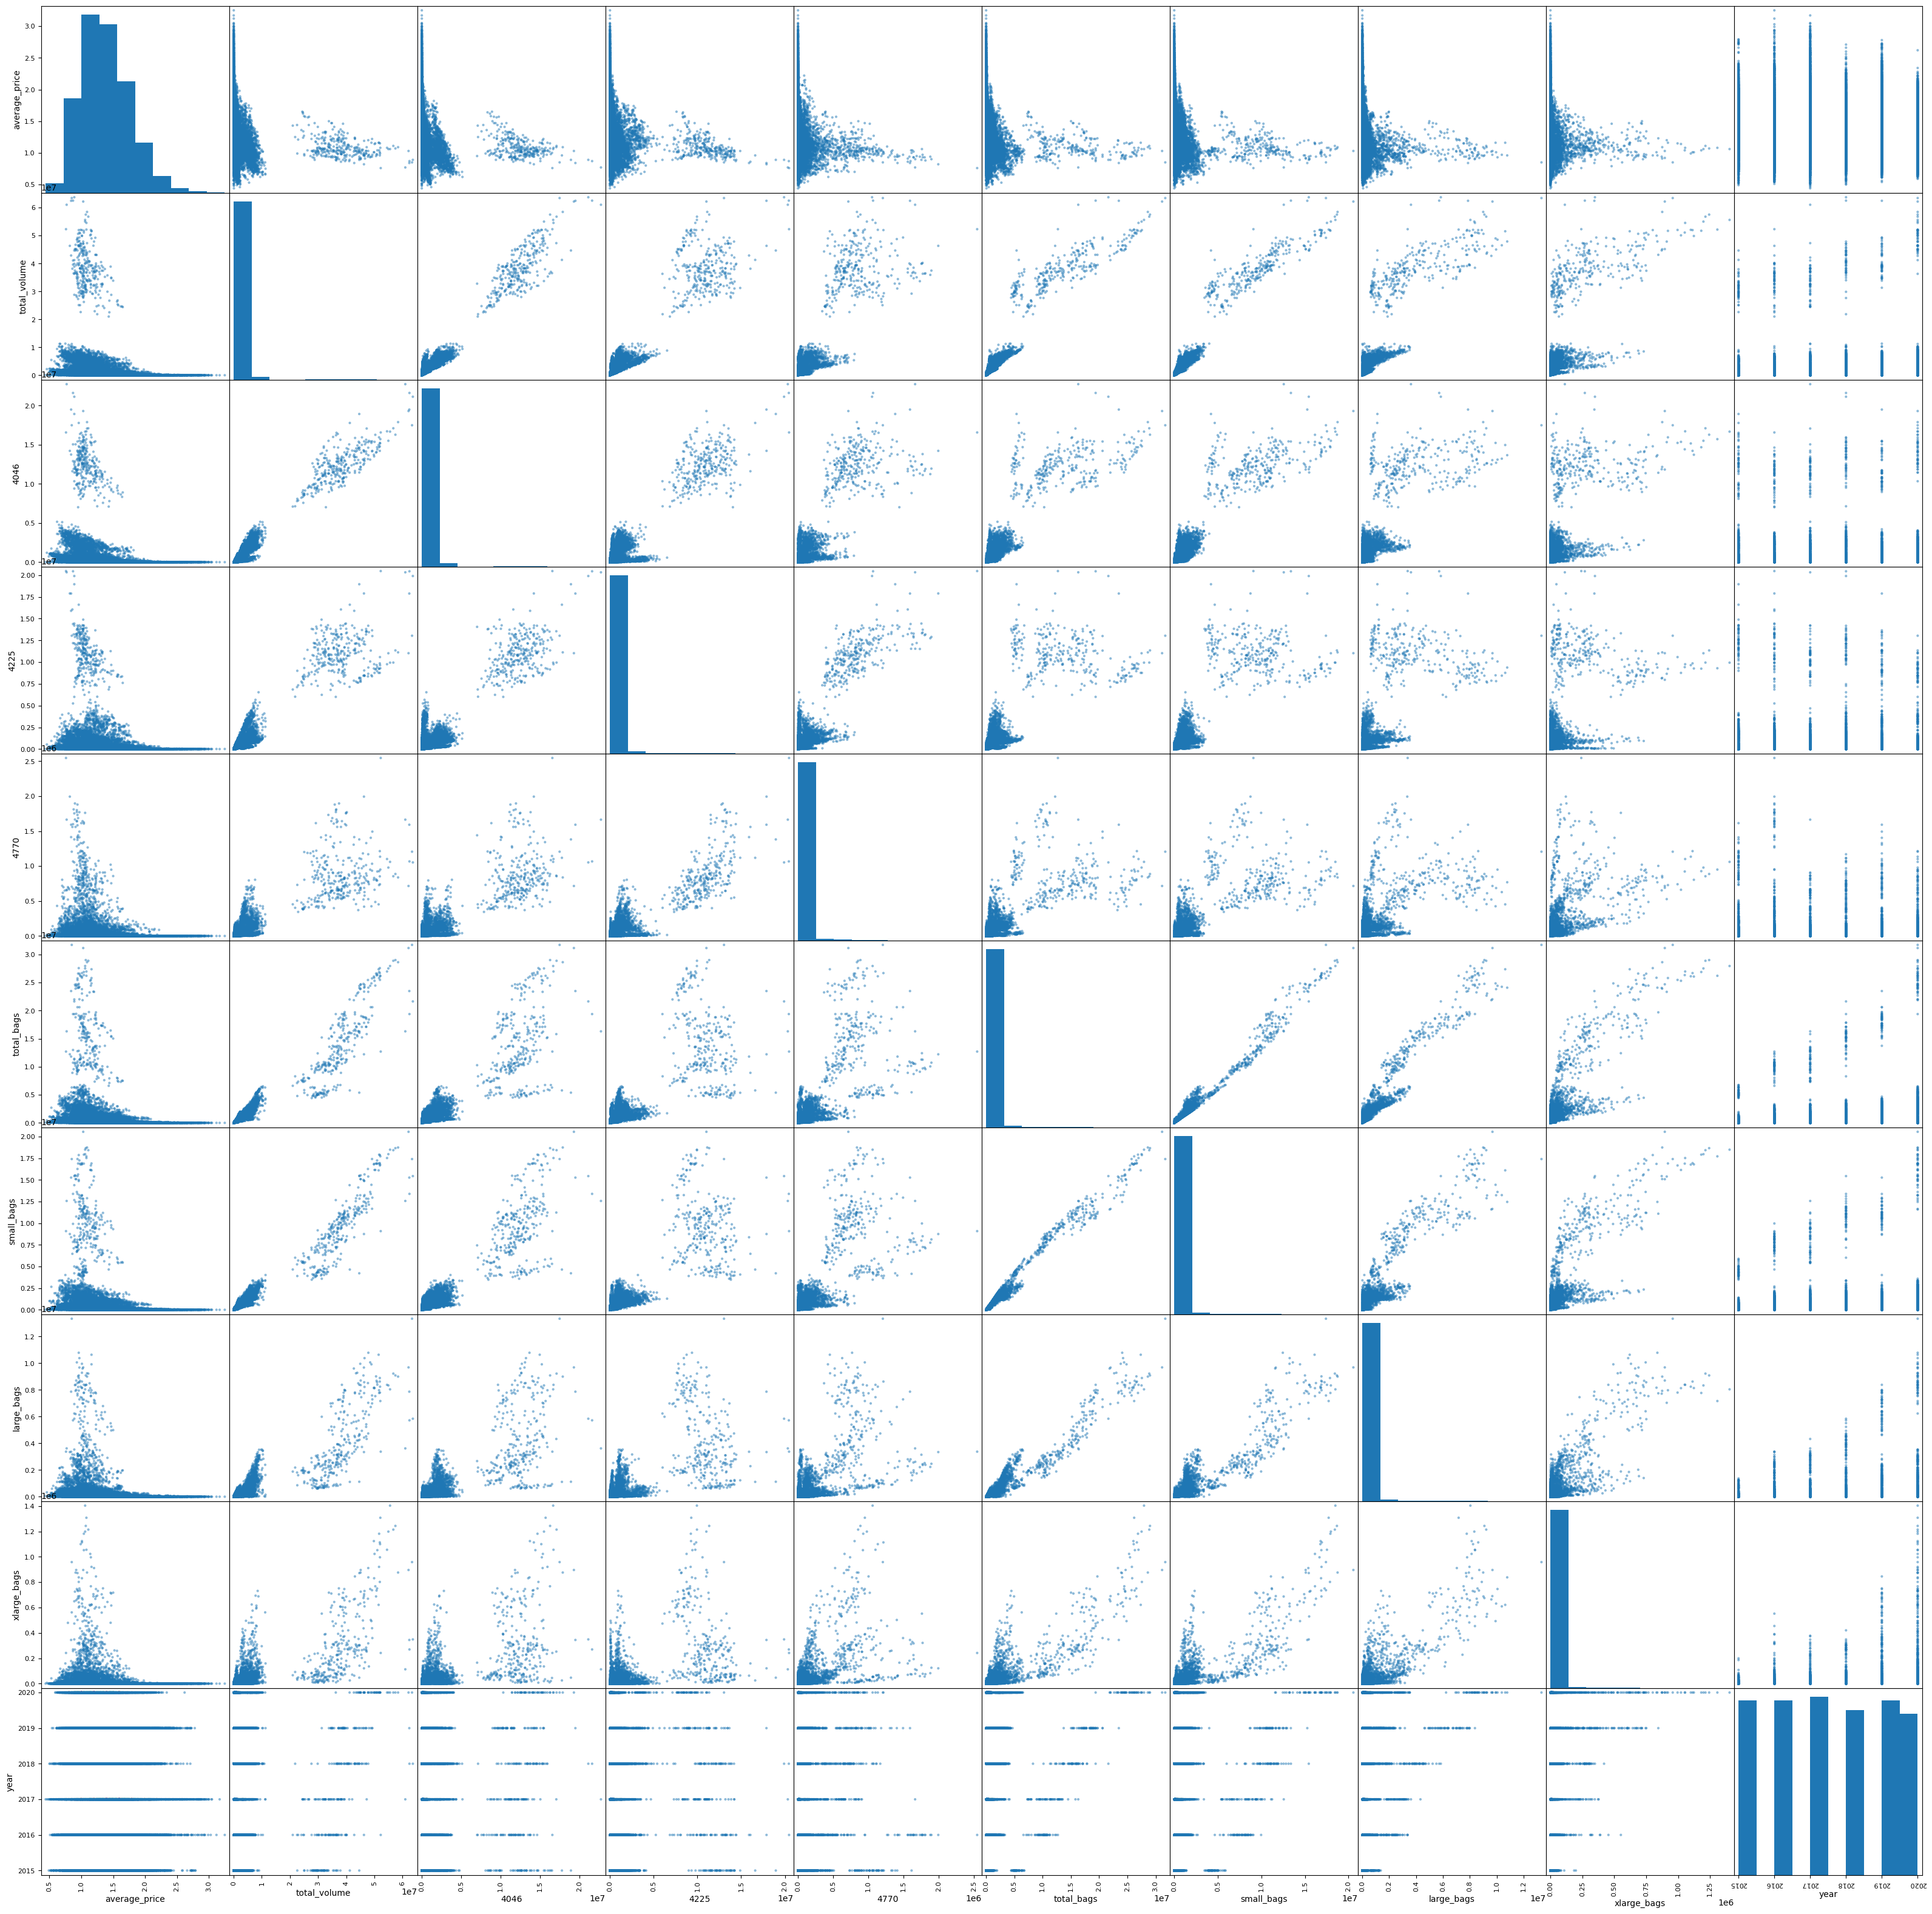

In [38]:
# create a scatter plot
plt.scatter(df2['geography'], df['average_price'])
plt.xlabel('geography')
plt.ylabel('average_price')
plt.title('geography vs average_price')

# create a scatter matrix
pd.plotting.scatter_matrix(df, figsize=(40, 40), diagonal='hist')
plt.xticks(rotation=180)
plt.show()

In [ ]:
# for col in df2.columns:
#     plt.bar(df2.index, df2[col], label=col)

# # add legend, x- and y-axis labels, and a title
# plt.legend()
# plt.xlabel('Index')
# plt.ylabel('Value')
# plt.title('Bar Plot of All Columns')

# plt.show()